In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [40]:
data=pd.read_csv('OnlineNewsPopularity.csv')
data.head(2)

,url,ID,Age of Poast,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,global_sentiment_polarity,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,amaM1,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,0,1,0,0,0,0,5,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.045662,0.013699,0.769231,0.230769,0.092562,0.378636,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,ap M2,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,0,0,1,0,0,0,4,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.043137,0.015686,0.733333,0.266667,0.148948,0.286915,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711


In [62]:
data.shape

(39644, 61)

In [42]:
data.columns

Index(['url', 'ID', 'Age of Poast', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' num_keywords', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' glo

In [ ]:
[' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
 ' num_keywords', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_rate_positive_words',
       ' rate_negative_words', ' global_sentiment_polarity',
       ' avg_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_title_sentiment_polarity']

In [63]:
# creating a grading criteria for the shares
share_data = data[' shares']
data[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [64]:
39644-39336 

308

In [67]:
data['Popularity']=pd.qcut(data[' shares'],2,labels=['Unpopular','Popular'])

In [68]:
data['Popularity'].value_counts()

Unpopular    20082
Popular      19562
Name: Popularity, dtype: int64

In [69]:
data.groupby('Popularity')[' shares'].min()

Popularity
Unpopular       1
Popular      1500
Name:  shares, dtype: int64

In [70]:
data.groupby('Popularity')[' shares'].max()

Popularity
Unpopular      1400
Popular      843300
Name:  shares, dtype: int64

In [72]:
data['is_weekday'] = (data[' weekday_is_monday'] +  data[' weekday_is_tuesday'] + data[' weekday_is_wednesday'] + 
                   data[' weekday_is_thursday'] + data[' weekday_is_friday'])

In [73]:
df_1 = data[[' data_channel_is_lifestyle', ' data_channel_is_entertainment',' data_channel_is_bus',
             ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world']]

In [74]:
data['data_channel_type']=df_1.idxmax(axis=1)

In [75]:
df_2 = data[[' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday']]

In [76]:
data['Days'] = df_2.idxmax(axis=1)

In [77]:
 #drop the old data
data.drop(labels=[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                       ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world', 
                 ' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                     ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday'], axis = 1, inplace=True)
print(data.shape)
data.head(n=10)

(39644, 52)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity,is_weekday,data_channel_type,Days
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular,1.0,data_channel_is_entertainment,weekday_is_monday
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular,1.0,data_channel_is_bus,weekday_is_monday
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular,1.0,data_channel_is_bus,weekday_is_monday
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular,1.0,data_channel_is_entertainment,weekday_is_monday
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular,1.0,data_channel_is_tech,weekday_is_monday
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8500.0,8500.0,8500.000000,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855,Unpopular,1.0,data_channel_is_tech,weekday_is_monday
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.0,0.020082,0.114705,0.020024,0.020015,0.825173,0.514480,0.268303,0.080208,0.016667,0.827957,0.172043,0.402039,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556,Unpopular,1.0,data_channel_is_lifestyle,weekday_is_monday
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,4.617796,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895

In [78]:
def outliers_indices(feature):
    mid = data[feature].mean()
    sigma = data[feature].std()
    return data[(data[feature] < mid - 3*sigma) | (data[feature] > mid + 3*sigma)].index

In [79]:
wrong_share = outliers_indices(' shares')
#wrong_vid = outliers_indices(' num_videos')
#wrong_img = outliers_indices(' num_imgs')
#wrong_content = outliers_indices(' n_tokens_content')
#wrong_title = outliers_indices(' n_tokens_title')
#wrong_num_hrefs = outliers_indices(' num_hrefs')
#wrong_num_self = outliers_indices(' num_self_hrefs')
out = set(wrong_share) 
#| set(wrong_vid) | set(wrong_img) | set(wrong_content) | set(wrong_title) | set(wrong_num_hrefs) | set(wrong_num_self)

data.drop(out, inplace=True)

In [116]:
data.shape

(39336, 52)

In [117]:
data.head(2)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity,is_weekday,data_channel_type,Days
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593,0,1.0,data_channel_is_entertainment,weekday_is_monday
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711,0,1.0,data_channel_is_bus,weekday_is_monday


In [118]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['data_channel_type'] = le.fit_transform(data['data_channel_type'])
data['Days'] = le.fit_transform(data['Days'])

In [114]:
data[' shares'].describe()

count    39336.000000
mean      2755.416260
std       3949.651794
min          1.000000
25%        942.000000
50%       1400.000000
75%       2700.000000
max      38200.000000
Name:  shares, dtype: float64

In [119]:
data['Popularity'].value_counts()

0    20082
1    19254
Name: Popularity, dtype: int64

In [120]:
data.groupby('Popularity')[' shares'].min()

Popularity
0       1
1    1500
Name:  shares, dtype: int64

In [121]:
data.groupby('Popularity')[' shares'].max()

Popularity
0     1400
1    38200
Name:  shares, dtype: int64

In [123]:
df1 = data.drop(columns=['url',' timedelta'])

In [124]:
df1.shape

(39336, 50)

In [128]:
df1.head(2)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity,is_weekday,data_channel_type,Days
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593,0,1.0,1,1
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711,0,1.0,0,1


In [129]:
X = df1.drop(['Popularity'],1)
y = df1['Popularity']

In [130]:
from sklearn.preprocessing import MinMaxScaler
feature=X.columns.values
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
x=pd.DataFrame(scaler.transform(X))
x.columns=feature
x.head(2)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,is_weekday,data_channel_type,Days
0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.0,0.582024,0.444444,0.002646,0.0,0.000023,0.0,0.0,0.0,0.000277,0.0,0.0,0.000588,0.000588,0.000588,0.0,0.539735,0.408532,0.043483,0.044534,0.043273,0.521617,0.433591,0.293670,0.074074,0.769231,0.230769,0.378636,0.100000,0.7,0.65000,0.400,0.8,0.5,0.40625,0.0,0.1875,0.015498,1.0,0.2,0.166667
1,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.0,0.611043,0.333333,0.002646,0.0,0.000023,0.0,0.0,0.0,0.000277,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.862741,0.054049,0.054453,0.054073,0.053927,0.341246,0.483864,0.277432,0.084822,0.733333,0.266667,0.286915,0.033333,0.7,0.88125,0.875,0.9,0.0,0.50000,1.0,0.0000,0.018587,1.0,0.0,0.166667


In [131]:
x = df1.drop(columns=[' shares','Popularity'])
y = df1['Popularity']

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30 ,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27535, 48)
(11801, 48)
(27535,)
(11801,)


In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from scipy.stats import levene
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import  mean_squared_error ,r2_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [136]:
model=LogisticRegression()
output=model.fit(x_train ,y_train)

Predict=model.predict(x_test)
print("Logistic classifer Accuracy")
print(metrics.accuracy_score(y_test,Predict)*100)

Logistic classifer Accuracy
60.69824591136344


In [137]:
model1=DecisionTreeClassifier()
output1=model1.fit(x_train ,y_train)

Predict1=model1.predict(x_test)
print("Decisipn tree classifer Accuracy")
print(metrics.accuracy_score(y_test,Predict1)*100)

Decisipn tree classifer Accuracy
57.45275824082705


In [138]:
model2=RandomForestClassifier()
output2=model2.fit(x_train ,y_train)

Predict2=model2.predict(x_test)
print("Random Forest classifer Accuracy")
print(metrics.accuracy_score(y_test,Predict2)*100)

Random Forest classifer Accuracy
62.0116939242437


In [139]:
model3=KNeighborsClassifier()
output3=model3.fit(x_train,y_train)

Predict3=model3.predict(x_test)
print("KNeighborsClassifier Accuracy")
print(metrics.accuracy_score(y_test,Predict3)*100)

KNeighborsClassifier Accuracy
56.156257944242014


In [143]:
gr=GradientBoostingClassifier()
output4 = gr.fit(x_train,y_train)

Predict4 = gr.predict(x_test)
print('GradieentBoosting')
print(metrics.accuracy_score(y_test,Predict4)*100)

GradieentBoosting
66.5875773239556


In [148]:
l=[]
auc =cross_val_score(gr,x,y,scoring='roc_auc',cv=3,)
l.append(auc)
print(np.mean(l))

0.704632237182491


# cross val:

In [150]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
bag = BaggingClassifier()
adaboost = AdaBoostClassifier()
adaboost_rf = AdaBoostClassifier(base_estimator=RF)
grad = GradientBoostingClassifier()

In [151]:
models = []
models.append(('LogReg',lr))
models.append(('KNN',knn))
models.append(('Decision Tree',DT))
models.append(('Random Forrest',RF))
models.append(('Bagged DT',bag))
models.append(('Ada Boost DT',adaboost))
models.append(('Ada boost Random Forrest',adaboost_rf))
models.append(('Gradient boosting',grad))

In [152]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=7,shuffle=True,random_state=0)
    auc = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='roc_auc')
    results.append(auc)
    names.append(name)
    print('%s: %f' % (name,np.mean(auc*100)))
    BE =1-np.mean(auc)#Bias error
    VE =np.var(1-auc,ddof=1)#variance error
    print("\t\tBais error : ", BE)
    print("\t\tVariance error: ",VE)

LogReg: 63.812109
		Bais error :  0.3618789065916872
		Variance error:  7.60249649059201e-05
KNN: 58.632770
		Bais error :  0.41367229529838667
		Variance error:  9.59495287324508e-05
Decision Tree: 57.912380
		Bais error :  0.4208762016308294
		Variance error:  3.643601798097666e-05
Random Forrest: 67.262433
		Bais error :  0.3273756671288831
		Variance error:  3.7557666060584684e-05
Bagged DT: 67.392492
		Bais error :  0.3260750761322646
		Variance error:  9.48664340271346e-05
Ada Boost DT: 71.582035
		Bais error :  0.2841796483729624
		Variance error:  4.315558041005863e-05
Ada boost Random Forrest: 69.672249
		Bais error :  0.30327751351738974
		Variance error:  6.718320403218245e-05
Gradient boosting: 72.785275
		Bais error :  0.2721472484860158
		Variance error:  6.73356445353829e-05


# eda:

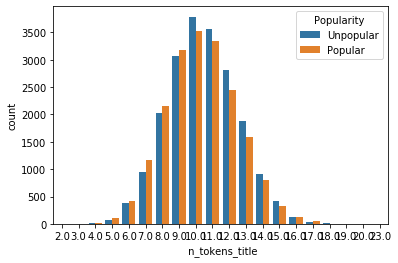

In [24]:
sns.countplot(data[' n_tokens_title'])

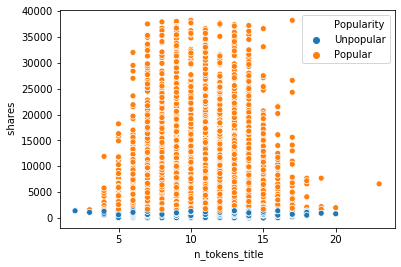

In [29]:
sns.scatterplot(x=data[' n_tokens_title'],y=data[' shares'],hue=data['Popularity'])

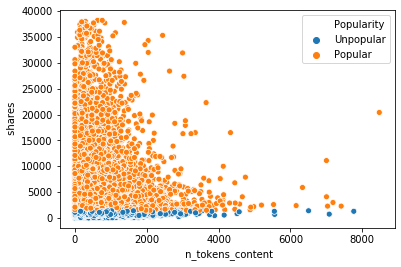

In [30]:
sns.scatterplot(x=data[' n_tokens_content'],y=data[' shares'],hue=data['Popularity'])

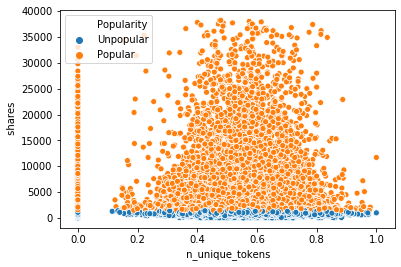

In [33]:
sns.scatterplot(x=data[' n_unique_tokens'][data[' n_unique_tokens']<100],y=data[' shares'],hue=data['Popularity'])

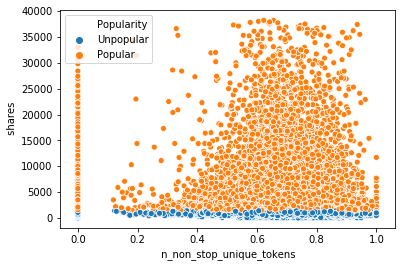

In [43]:
sns.scatterplot(x=data[' n_non_stop_unique_tokens'][data[' n_non_stop_unique_tokens']<100],y=data[' shares'],hue=data['Popularity'])

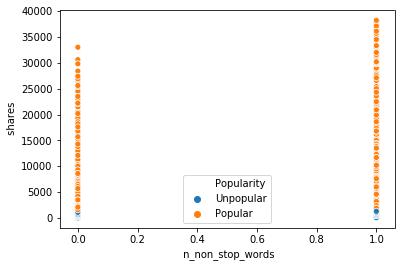

In [42]:
sns.scatterplot(x=data[' n_non_stop_words'][data[' n_non_stop_words']<1],y=data[' shares'],hue=data['Popularity'])

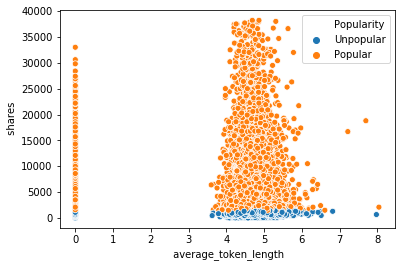

In [48]:
sns.scatterplot(x=data[' average_token_length'],y=data[' shares'],hue=data['Popularity'])

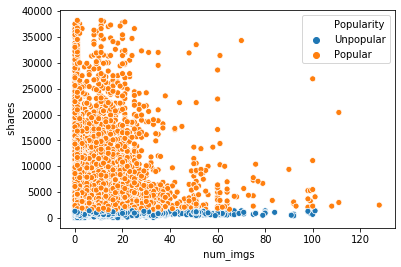

In [49]:
sns.scatterplot(x=data[' num_imgs'],y=data[' shares'],hue=data['Popularity'])

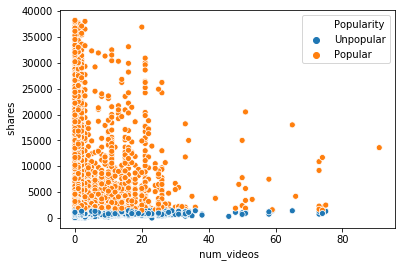

In [50]:
sns.scatterplot(x=data[' num_videos'],y=data[' shares'],hue=data['Popularity'])

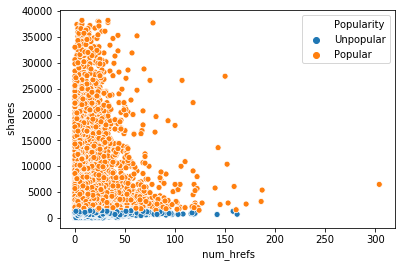

In [53]:
sns.scatterplot(x=data[' num_hrefs'],y=data[' shares'],hue=data['Popularity'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39336 entries, 0 to 39643
Data columns (total 63 columns):
url                               39336 non-null object
ID                                39336 non-null object
Age of Poast                      39336 non-null int64
 n_tokens_title                   39336 non-null int64
 n_tokens_content                 39336 non-null int64
 n_unique_tokens                  39336 non-null float64
 n_non_stop_words                 39336 non-null float64
 n_non_stop_unique_tokens         39336 non-null float64
 num_hrefs                        39336 non-null int64
 num_self_hrefs                   39336 non-null int64
 num_imgs                         39336 non-null int64
 num_videos                       39336 non-null int64
 average_token_length             39336 non-null float64
 data_channel_is_lifestyle        39336 non-null int64
 data_channel_is_entertainment    39336 non-null int64
 data_channel_is_bus              39336 non-null int64
 

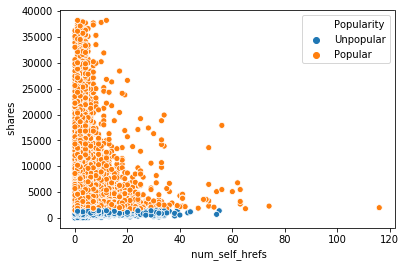

In [54]:
sns.scatterplot(x=data[' num_self_hrefs'],y=data[' shares'],hue=data['Popularity'])

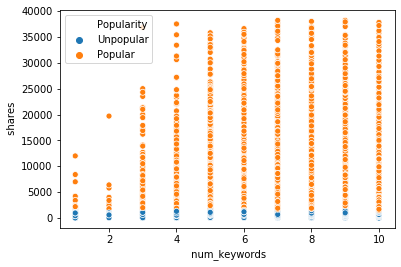

In [57]:
sns.scatterplot(x=data[' num_keywords'],y=data[' shares'],hue=data['Popularity'])

In [58]:
data.columns

Index(['url', 'Date', 'ID', 'Age of Poast', ' n_tokens_title',
       ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' num_keywords',
       ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max',
       ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity

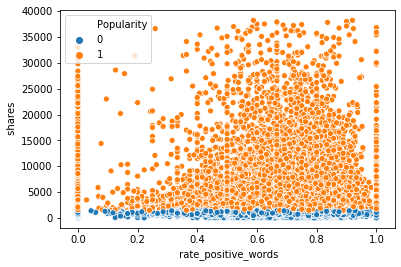

In [81]:
sns.scatterplot(x=data[' rate_positive_words'],y=data[' shares'],hue=data['Popularity'])

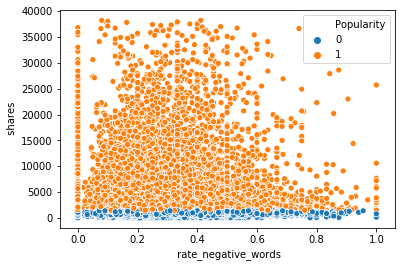

In [82]:
sns.scatterplot(x=data[' rate_negative_words'],y=data[' shares'],hue=data['Popularity'])

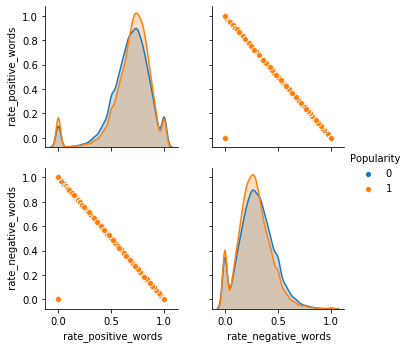

In [76]:
a=data[[' rate_positive_words', ' rate_negative_words']]
sns.pairplot(data,vars=a,hue='Popularity',diag_kind='kde')

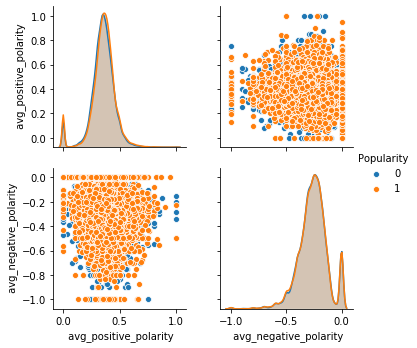

In [80]:
b=data[[' avg_positive_polarity',' avg_negative_polarity']]
sns.pairplot(data,vars=b,hue='Popularity',diag_kind='kde')

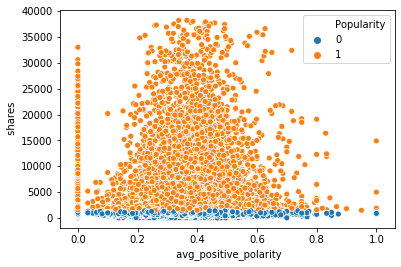

In [83]:
sns.scatterplot(x=data[' avg_positive_polarity'],y=data[' shares'],hue=data['Popularity'])

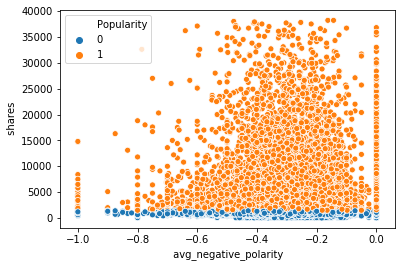

In [84]:
sns.scatterplot(x=data[' avg_negative_polarity'],y=data[' shares'],hue=data['Popularity'])

In [25]:
data.columns

Index(['url', 'ID', 'Age of Poast', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' num_keywords', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' glo

In [90]:
y=data['Popularity']
x=data[[ ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' global_sentiment_polarity',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_title_subjectivity', ' abs_title_sentiment_polarity']]

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
df_scaled = scaler.transform(x)

In [92]:
from sklearn.tree import ExtraTreeClassifier
ET =ExtraTreeClassifier()
ET.fit(x,y)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

In [95]:
ET.feature_importances_

array([0.02146023, 0.02421061, 0.02300455, 0.00057955, 0.02431339,
       0.02494835, 0.02136345, 0.02105928, 0.01962611, 0.02310547,
       0.02585058, 0.01184175, 0.0224557 , 0.02130019, 0.01881123,
       0.00913033, 0.02654025, 0.03661821, 0.0243076 , 0.02640759,
       0.02320467, 0.02254872, 0.02586928, 0.01949017, 0.03155646,
       0.02369667, 0.02689728, 0.02730132, 0.02815551, 0.02488423,
       0.02201482, 0.02067323, 0.01950744, 0.02594213, 0.02483136,
       0.02567996, 0.02021607, 0.01991541, 0.02229606, 0.02206992,
       0.01936117, 0.01937669, 0.01988796, 0.01825873, 0.01943036])

<BarContainer object of 45 artists>

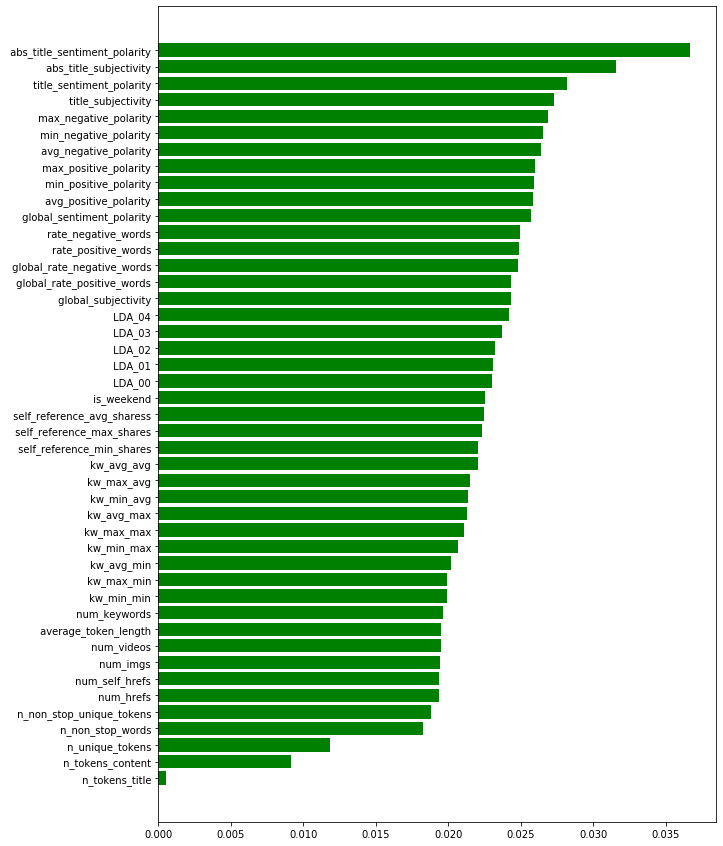

In [104]:
plt.figure(figsize=(10,15))
plt.barh(y=x.columns,width=np.sort(ET.feature_importances_),color='g')

In [93]:
ET.feature_importances_.plot(kind='bar')

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_scaled,y,test_size=0.3,random_state=0)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print('R^2= ', metrics.accuracy_score(y_test,y_pred))

R^2=  0.6474875010592323


In [111]:
LR.coef_.plot(kind='bar')

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

TypeError: only size-1 arrays can be converted to Python scalars

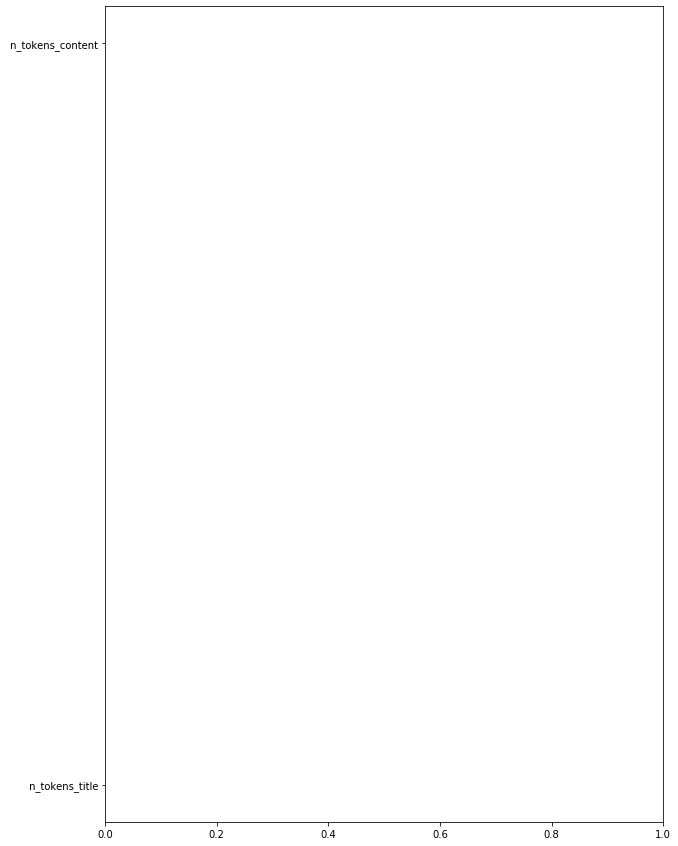

In [109]:
plt.figure(figsize=(10,15))
plt.barh(y=x.columns,width=LR.coef_,color='g')

In [30]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
print('R^2= ', metrics.accuracy_score(y_test,y_pred))

R^2=  0.5757986611304127


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=10)
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
print('R^2= ', metrics.accuracy_score(y_test,y_pred))

In [32]:
import statsmodels.api as sm
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

[' n_tokens_content', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' average_token_length', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', ' min_positive_polarity', ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity']


In [33]:
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, len(cols))
X_rfe = rfe.fit_transform(x,y)  

model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True False  True  True  True  True  True  True  True]
[ 1  6  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  4 12  9 16 13 14  7
  8  5 11 15 10  1  1  1  1  1  1  1  1  1  1  1  1  1  1 17  1  1  1  1
  1  1  3  1  1  1  1  1  1  1]


In [ ]:
nof_list=np.arange(1,60)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [36]:
cols = list(x.columns)
model = LogisticRegression()
rfe = RFE(model, 60)             
X_rfe = rfe.fit_transform(x,y)  

model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' num_keywords',
       ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max',
       ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_rate_positive_words', ' g

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()